# Load Libraries

In [39]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import nltk
import re
from nltk.stem import PorterStemmer
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# Load data

In [ ]:
train_data = pd.read_csv("train.csv", names=["Comment", "Emotion"], encoding="utf-8")

In [41]:
train_data

,Comment,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
15995,i just had a very brief time in the beanbag an...,sadness
15996,i am now turning and i feel pathetic that i am...,sadness
15997,i feel strong and good overall,joy
15998,i feel like this was such a rude comment and i...,anger


In [42]:
train_data.shape

(16000, 2)

In [43]:
train_data.isnull().sum()

Comment    0
Emotion    0
dtype: int64

In [44]:
train_data.duplicated().sum()

1

# Exploratory Data Analysis

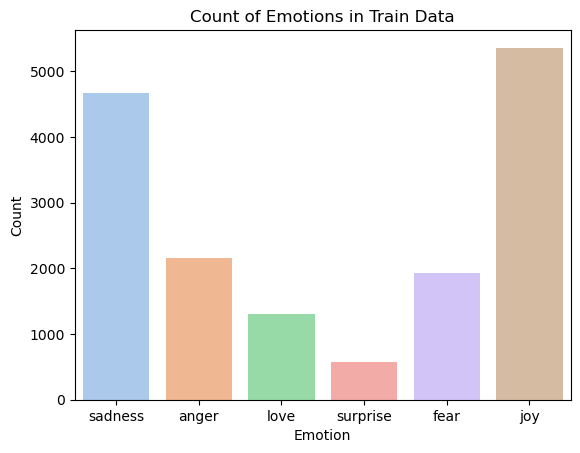

In [45]:
sns.countplot(data=train_data, x='Emotion',hue='Emotion' ,palette='pastel')

plt.title('Count of Emotions in Train Data')
plt.xlabel('Emotion')
plt.ylabel('Count')

plt.show()

# Data Preprocessing
# Encode emotions

In [46]:
lb = LabelEncoder()
train_data['Emotion'] = lb.fit_transform(train_data['Emotion'])

In [47]:
train_data

,Comment,Emotion
0,i didnt feel humiliated,4
1,i can go from feeling so hopeless to so damned...,4
2,im grabbing a minute to post i feel greedy wrong,0
3,i am ever feeling nostalgic about the fireplac...,3
4,i am feeling grouchy,0
...,...,...
15995,i just had a very brief time in the beanbag an...,4
15996,i am now turning and i feel pathetic that i am...,4
15997,i feel strong and good overall,2
15998,i feel like this was such a rude comment and i...,0


# Applying Machine Learning

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [49]:
df = train_data.copy() 

In [50]:
df

,Comment,Emotion
0,i didnt feel humiliated,4
1,i can go from feeling so hopeless to so damned...,4
2,im grabbing a minute to post i feel greedy wrong,0
3,i am ever feeling nostalgic about the fireplac...,3
4,i am feeling grouchy,0
...,...,...
15995,i just had a very brief time in the beanbag an...,4
15996,i am now turning and i feel pathetic that i am...,4
15997,i feel strong and good overall,2
15998,i feel like this was such a rude comment and i...,0


In [51]:
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
def clean_text(text):
    stemmer = PorterStemmer()
    text = re.sub("[^a-zA-Z]", " ", text)
    text = text.lower()
    text = text.split()
    text = [stemmer.stem(word) for word in text if word not in stopwords]
    return " ".join(text)

df['cleaned_comment'] = df['Comment'].apply(clean_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bekoa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [52]:
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_comment'],df['Emotion'],test_size=0.2,random_state=42)

In [53]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [54]:
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)
y_pred = model.predict(X_test_tfidf)

In [55]:
y_pred_tfidf = model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred_tfidf))

              precision    recall  f1-score   support

           0       0.88      0.79      0.83       427
           1       0.84      0.73      0.78       397
           2       0.78      0.94      0.85      1021
           3       0.80      0.49      0.61       296
           4       0.88      0.92      0.90       946
           5       0.77      0.45      0.57       113

    accuracy                           0.83      3200
   macro avg       0.82      0.72      0.76      3200
weighted avg       0.83      0.83      0.82      3200



In [56]:
print(accuracy_score(y_test, y_pred_tfidf))

0.829375


In [57]:
import pickle
pickle.dump(model,open("logistic_regresion.pkl",'wb'))
pickle.dump(lb,open("label_encoder.pkl",'wb'))
pickle.dump(tfidf_vectorizer,open("tfidf_vectorizer.pkl",'wb'))